In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Data Cleaning
df = pd.read_csv("title.basics.csv")
df.head()
df.info()
df.describe()
df.shape
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [4]:
df1 = pd.read_csv("title.ratings.csv")
df1.head()
df1.info()
df1.describe()
df1.shape
df1.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [5]:
df2 = pd.read_csv("bom.movie_gross.csv")
df2.head()
df2.info()
df2.describe()
df2.shape
df2.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [7]:
df = df.replace(['null', None], np.nan)

In [8]:
df1 = df1.replace(['null', None], np.nan)

In [9]:
df2 = df2.replace(['null', None], np.nan)

In [10]:
print(df)


           tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [11]:
print(df.head())

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [12]:
print(df1)

           tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [13]:
print(df2)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [14]:
#Distribution of sales price.
most_common_studio = df2['studio'].value_counts().idxmax()
most_common_count = df2['studio'].value_counts().max()

print("Most Common Studio:", most_common_studio, "appears", most_common_count, "times")



Most Common Studio: IFC appears 166 times


In [15]:
highest_domestic = df2.groupby('studio')['domestic_gross'].sum().idxmax()
highest_domestic_gross = df2.groupby('studio')['domestic_gross'].sum().max()

print("Studio with Highest Domestic Gross:", highest_domestic, "($", highest_domestic_gross, ")")


Studio with Highest Domestic Gross: BV ($ 18419029199.0 )


In [16]:
lowest_domestic = df2.groupby('studio')['domestic_gross'].sum().idxmin()
lowest_domestic_gross = df2.groupby('studio')['domestic_gross'].sum().min()

print("Studio with lowest Domestic Gross:", lowest_domestic, "($", lowest_domestic_gross, ")")

Studio with lowest Domestic Gross: Myr. ($ 0.0 )


In [17]:
# Convert foreign_gross to numeric (remove commas and convert to numbers)
df2['foreign_gross'] = df2['foreign_gross'].replace(',', '', regex=True)
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

# Now group and find the highest foreign gross
highest_foreign = df2.groupby('studio')['foreign_gross'].sum().idxmax()
highest_foreign_gross = df2.groupby('studio')['foreign_gross'].sum().max()

print("Studio with Highest Foreign Gross:", highest_foreign, "($", highest_foreign_gross, ")")


Studio with Highest Foreign Gross: BV ($ 25793854700.1 )


In [18]:
# Convert foreign_gross to numeric (remove commas and convert to numbers)
df2['foreign_gross'] = df2['foreign_gross'].replace(',', '', regex=True)
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

# Now group and find the highest foreign gross
lowest_foreign = df2.groupby('studio')['foreign_gross'].sum().idxmin()
lowest_foreign_gross = df2.groupby('studio')['foreign_gross'].sum().min()

print("Studio with lowest Foreign Gross:", lowest_foreign, "($", lowest_foreign_gross, ")")


Studio with lowest Foreign Gross: A23 ($ 0.0 )


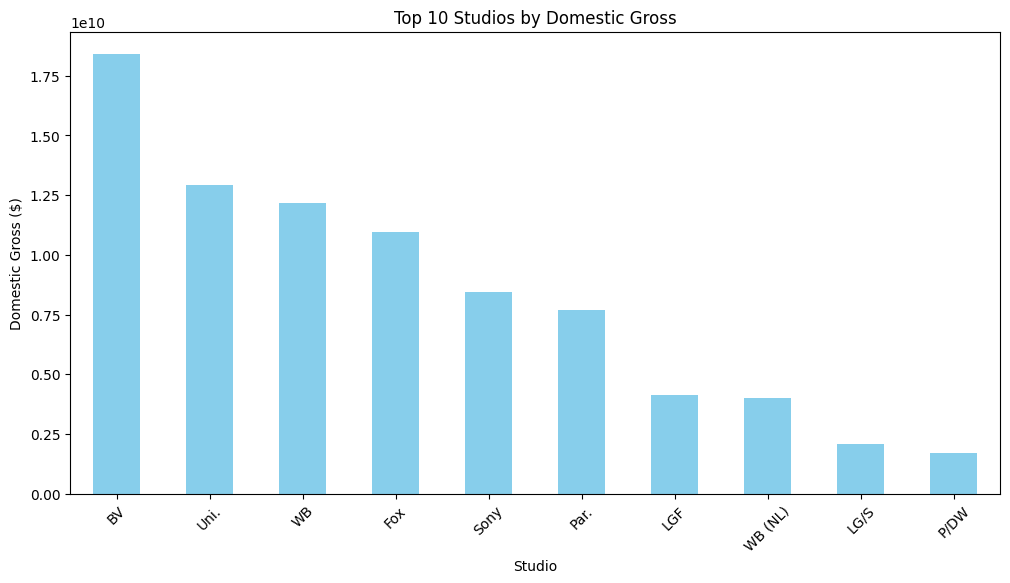

In [19]:
# Top 5 studios by domestic gross
top_domestic = df2.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_domestic.plot(kind='bar', color='skyblue')
plt.title("Top 10 Studios by Domestic Gross")
plt.xlabel("Studio")
plt.ylabel("Domestic Gross ($)")
plt.xticks(rotation=45)
plt.show()

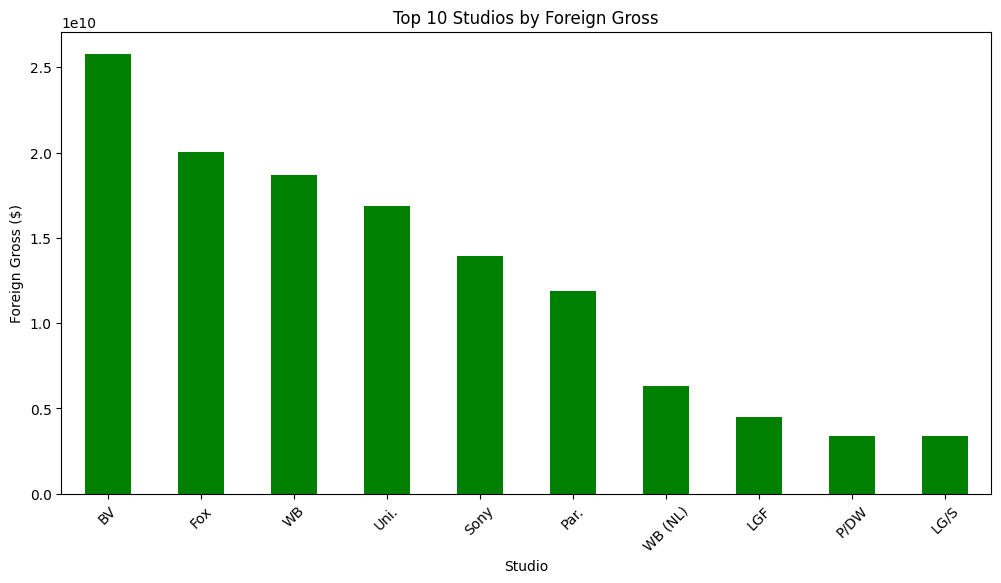

In [20]:
# Top 5 studios by foreign gross
top_foreign = df2.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_foreign.plot(kind='bar', color='green')
plt.title("Top 10 Studios by Foreign Gross")
plt.xlabel("Studio")
plt.ylabel("Foreign Gross ($)")
plt.xticks(rotation=45)
plt.show()

In [21]:
#get studio title and genre
merged_df = pd.merge(
    df2[['title', 'studio']],     # Only keep relevant columns
    df[['original_title', 'genres']],  # Only keep relevant columns
    left_on='title',
    right_on='original_title',
    how='inner'  # inner join: only matching titles
)
# Drop duplicate column if needed
merged_df.drop(columns='original_title', inplace=True)

print(merged_df)

                           title  studio                      genres
0                    Toy Story 3      BV  Adventure,Animation,Comedy
1                      Inception      WB     Action,Adventure,Sci-Fi
2            Shrek Forever After    P/DW  Adventure,Animation,Comedy
3     The Twilight Saga: Eclipse    Sum.     Adventure,Drama,Fantasy
4                     Iron Man 2    Par.     Action,Adventure,Sci-Fi
...                          ...     ...                         ...
2771                  The Escape     IFC                       Drama
2772                    Souvenir  Strand         Drama,Music,Romance
2773                    Souvenir  Strand              Comedy,Romance
2774                    Souvenir  Strand                 Documentary
2775           An Actor Prepares   Grav.                      Comedy

[2776 rows x 3 columns]


In [22]:
#studio with most genres
# Group by studio and count genres
studio_genre_count = (
    merged_df.groupby('studio')['genres']
    .count()          # Use .nunique() if you want unique genres per studio
    .sort_values(ascending=False)
    .reset_index()
)

print(studio_genre_count)


    studio  genres
0     Uni.     174
1      Fox     148
2      IFC     134
3       WB     122
4      LGF     101
..     ...     ...
186    TVC       1
187     XL       1
188    WOW       1
189    Zee       1
190    SDS       0

[191 rows x 2 columns]


In [ ]:

# Top 10 studios
top_10_studios = studio_genre_count.head(10)
print("Top 10 Studios by number of  Genres they indulge in:")
print(top_10_studios)

# Bottom 10 studios
bottom_10_studios = studio_genre_count.tail(10)
print("\nBottom 10 Studios by number of  Genres they indulge in:")



Top 10 Studios by number of  Genres they indulge in:
  studio  genres
0   Uni.     174
1    Fox     148
2    IFC     134
3     WB     122
4    LGF     101
5     BV      95
6   Par.      94
7  Magn.      94
8    SPC      88
9   Sony      87

Bottom 10 Studios by number of  Genres they indulge in:
        studio  genres
181       TAFC       1
182         TA       1
183       Viv.       1
184       Triu       1
185  Trafalgar       1
186        TVC       1
187         XL       1
188        WOW       1
189        Zee       1
190        SDS       0


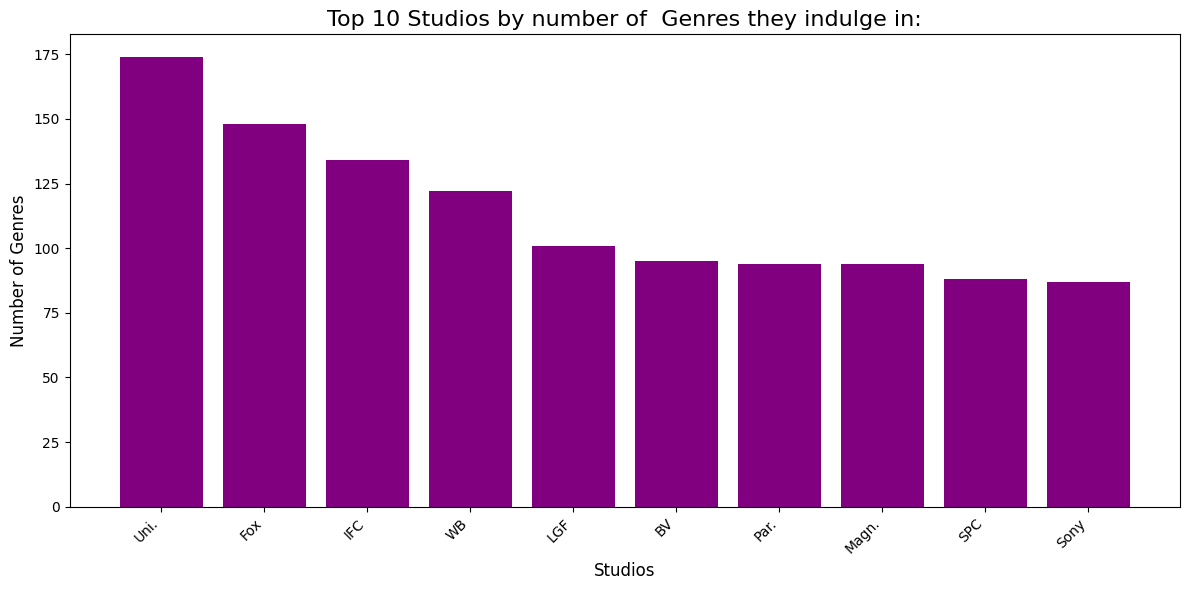

In [33]:

# Plot bar graph
plt.figure(figsize=(12, 6))  # Increase figure size for spacing
plt.bar(top_10_studios['studio'], top_10_studios['genres'], color='purple')

# Title and labels
plt.title("Top 10 Studios by number of  Genres they indulge in:", fontsize=16)
plt.xlabel("Studios", fontsize=12)
plt.ylabel("Number of Genres", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# respective movies and ratings
merged_df1 = pd.merge(df[['tconst', 'original_title', 'runtime_minutes']],
                     df1[['tconst', 'averagerating', 'numvotes']],
                     on='tconst',
                     how='inner')

# Drop tconst column
merged_df1 = merged_df1.drop(columns=['tconst'])

# Display result
print(merged_df1)

                   original_title  runtime_minutes  averagerating  numvotes
0                       Sunghursh            175.0            7.0        77
1                 Ashad Ka Ek Din            114.0            7.2        43
2      The Other Side of the Wind            122.0            6.9      4517
3                 Sabse Bada Sukh              NaN            6.1        13
4           La Telenovela Errante             80.0            6.5       119
...                           ...              ...            ...       ...
73851            Diabolik sono io             75.0            6.2         6
73852           Sokagin Çocuklari             98.0            8.7       136
73853                   Albatross              NaN            8.5         8
73854  La vida sense la Sara Amat              NaN            6.6         5
73855                  Drømmeland             72.0            6.5        11

[73856 rows x 4 columns]


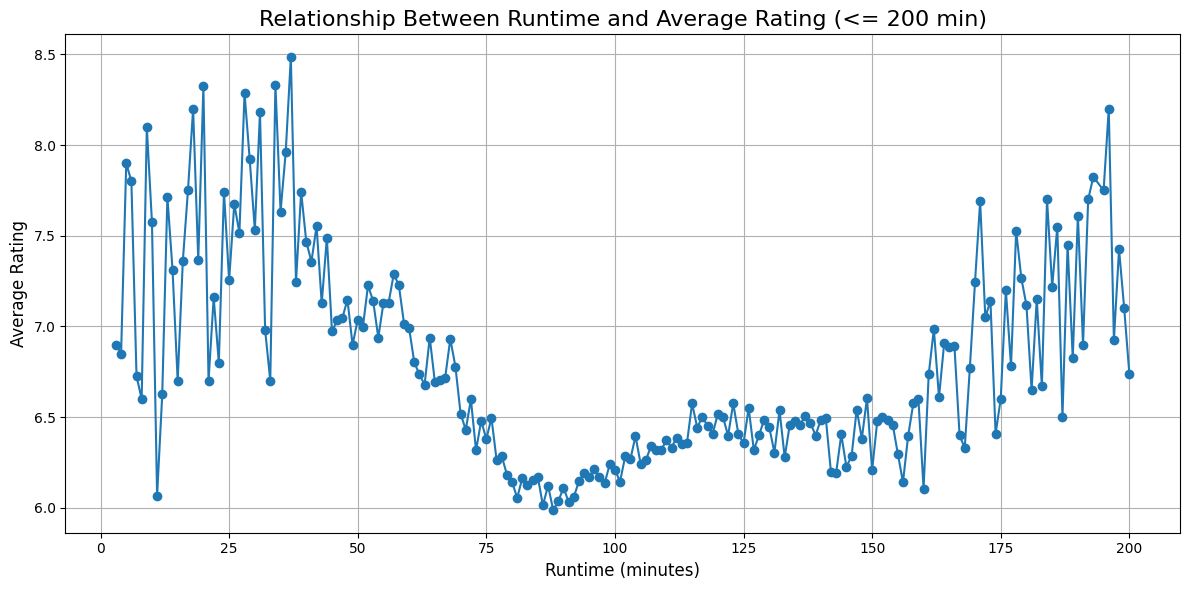

In [47]:
# Filter runtime to be <= 200 minutes
filtered_df = merged_df1[merged_df1['runtime_minutes'] <= 200]

# Group by runtime and calculate average rating
runtime_rating = filtered_df.groupby('runtime_minutes')['averagerating'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(runtime_rating['runtime_minutes'], runtime_rating['averagerating'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Relationship Between Runtime and Average Rating (<= 200 min)', fontsize=16)

plt.grid(True)
plt.tight_layout()
plt.show()

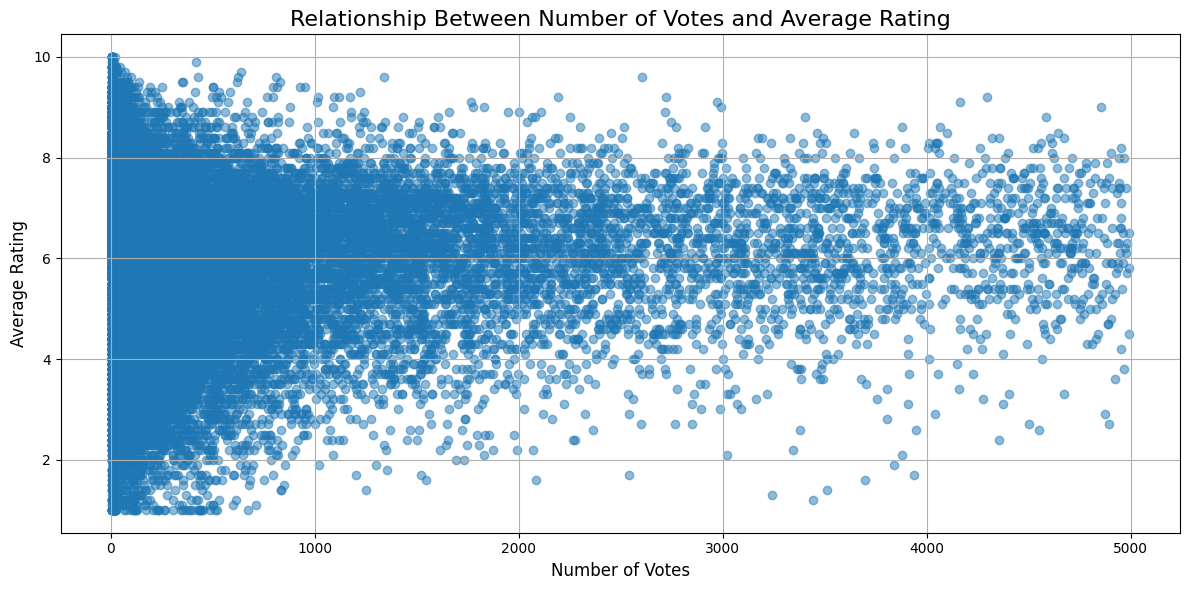

In [48]:
#
# Filter out movies with extremely high numvotes (optional, for better visualization)
filtered_df1 = merged_df1[merged_df1['numvotes'] <= 5000]  # limit for clearer view

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df1['numvotes'], filtered_df1['averagerating'], alpha=0.5)

# Labels and title
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Relationship Between Number of Votes and Average Rating', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
#Studios with their respective titles
df2_selected = df2.iloc[:, [0, 1]]  # 0 = title, 1 = studio

print(df2_selected)

                                            title      studio
0                                     Toy Story 3          BV
1                      Alice in Wonderland (2010)          BV
2     Harry Potter and the Deathly Hallows Part 1          WB
3                                       Inception          WB
4                             Shrek Forever After        P/DW
...                                           ...         ...
3382                                    The Quake       Magn.
3383                  Edward II (2018 re-release)          FM
3384                                     El Pacto        Sony
3385                                     The Swan  Synergetic
3386                            An Actor Prepares       Grav.

[3387 rows x 2 columns]


In [31]:
# Sort studios by frequency (most to least)
studio_frequency = df2_selected['studio'].value_counts()

print(studio_frequency)

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
Crimson         1
EF              1
Arrow           1
Hiber           1
Synergetic      1
Name: count, Length: 257, dtype: int64


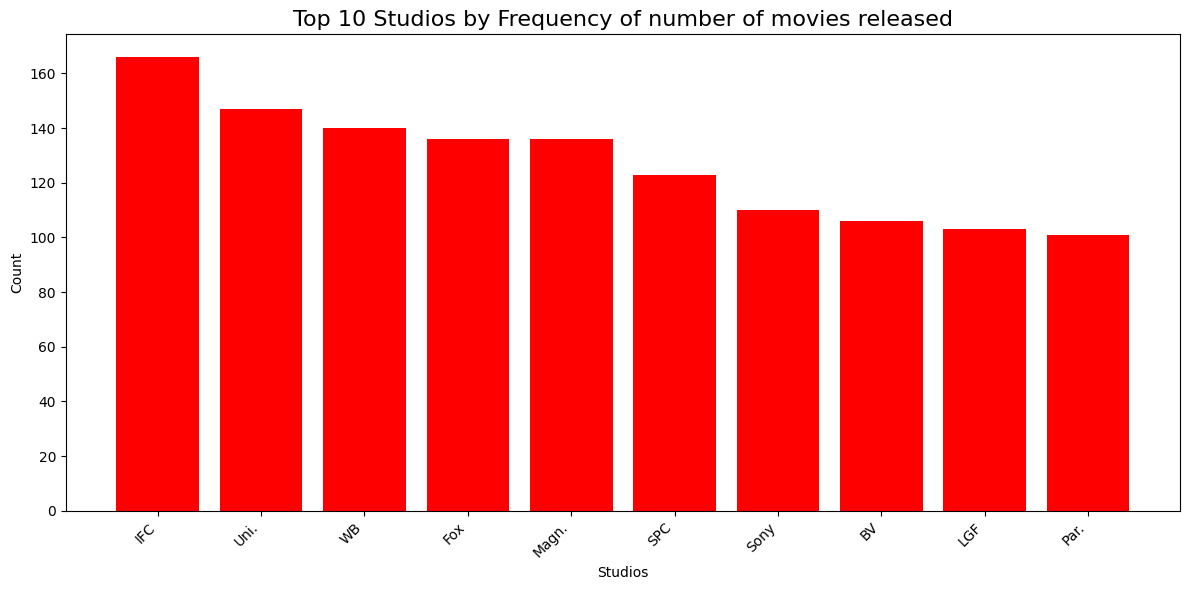

In [36]:
# Convert to DataFrame for easier plotting
studio_frequency_df = studio_frequency.reset_index()
studio_frequency_df.columns = ['studio', 'count']

# Top 10 studios
top_10 = studio_frequency_df.head(10)

# Bottom 10 studios
bottom_10 = studio_frequency_df.tail(10)

# Plot Top 10 Studios
plt.figure(figsize=(12, 6))
plt.bar(top_10['studio'], top_10['count'], color='red')
plt.title("Top 10 Studios by Frequency of number of movies released", fontsize=16)
plt.xlabel("Studios")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

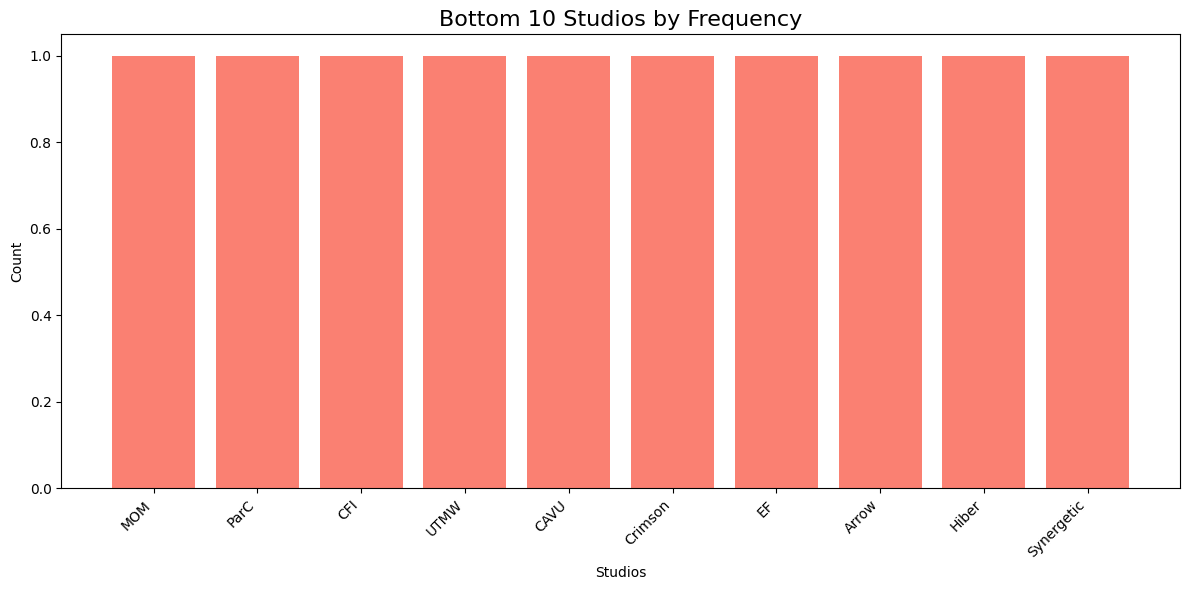

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(bottom_10['studio'], bottom_10['count'], color='salmon')
plt.title("Bottom 10 Studios by Frequency", fontsize=16)
plt.xlabel("Studios")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# Check titles that exist in merged_df1 but not in df2
unmatched_titles = set(merged_df1['original_title']) - set(df2.iloc[:, 0].str.lower().str.strip())
print("Unmatched titles count:", len(unmatched_titles))
print(list(unmatched_titles)[:50])  # Show first 50 unmatched titles

Unmatched titles count: 68825
['where the water runs', 'montevideo', 'charlotte a du fun', 'mantra: sounds into silence', 'pharisee', 'colpi di fulmine', 'harry t. moore', 'eight summits: the bill burke story', 'dwelling', "no land's song", 'opening night', 'last fisherman', 'muita calma nessa hora 2', 'köntörfalak', 'the ghetto', "l'assaut", 'jerseyboy hero', 'accession', 'hello again', 'davena vihagun', 'jia nian hua', 'swipe', 'nirmala convent', 'the turtle and the sea', 'luv u soniyo', 'project: user', 'cha-i-na-ta-un', 'survival instinct', 'kaagaz ki kashti', 'intimnye mesta', 'la huella en la niebla', 'the sweet life', "trailer park boys: don't legalize it", 'age of heroes', 'the pretty one', 'born to lose', 'setelah 15 tahun...', 'no bed of roses', 'vielä pienen hetken vierelläsi', 'k', 'las aventuras de lily ojos de gato', 'webcast', 'a haunting history', 'coal india', 'they are we', "the skyjacker's tale", 'imai', "wasn't afraid to die", 'do not resist', 'coldwood']


In [ ]:
#Does Runtime affect averagerating?
